In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv("stroke.csv")
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [3]:
df.shape

(15304, 12)

In [4]:
# Provide a summary of the dataset
print("\nSummary of the dataset:")

# 1. Number of missing values in each column
missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values)

# 2. Data types of each column
data_types = df.dtypes
print("\nData types of each column:")
print(data_types)

# 3. Basic statistics (mean, median, mode, etc.)
statistics = df.describe(include='all')
print("\nBasic Statistics:")
print(statistics)

# Additional statistics like mode for each column
modes = df.mode().iloc[0]  # Mode can return multiple values; we take the first one
print("\nMode of each column:")
print(modes)


Summary of the dataset:

Missing values per column:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Data types of each column:
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Basic Statistics:
                  id  gender           age  hypertension  heart_disease  \
count   15304.000000   15304  15304.000000  15304.000000   15304.000000   
unique           NaN       3           NaN           NaN            NaN   
top              NaN  Fe

In [5]:
data_types = df.dtypes
print("\nData types of each column:")
print(data_types)


Data types of each column:
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


<Figure size 1500x1200 with 0 Axes>

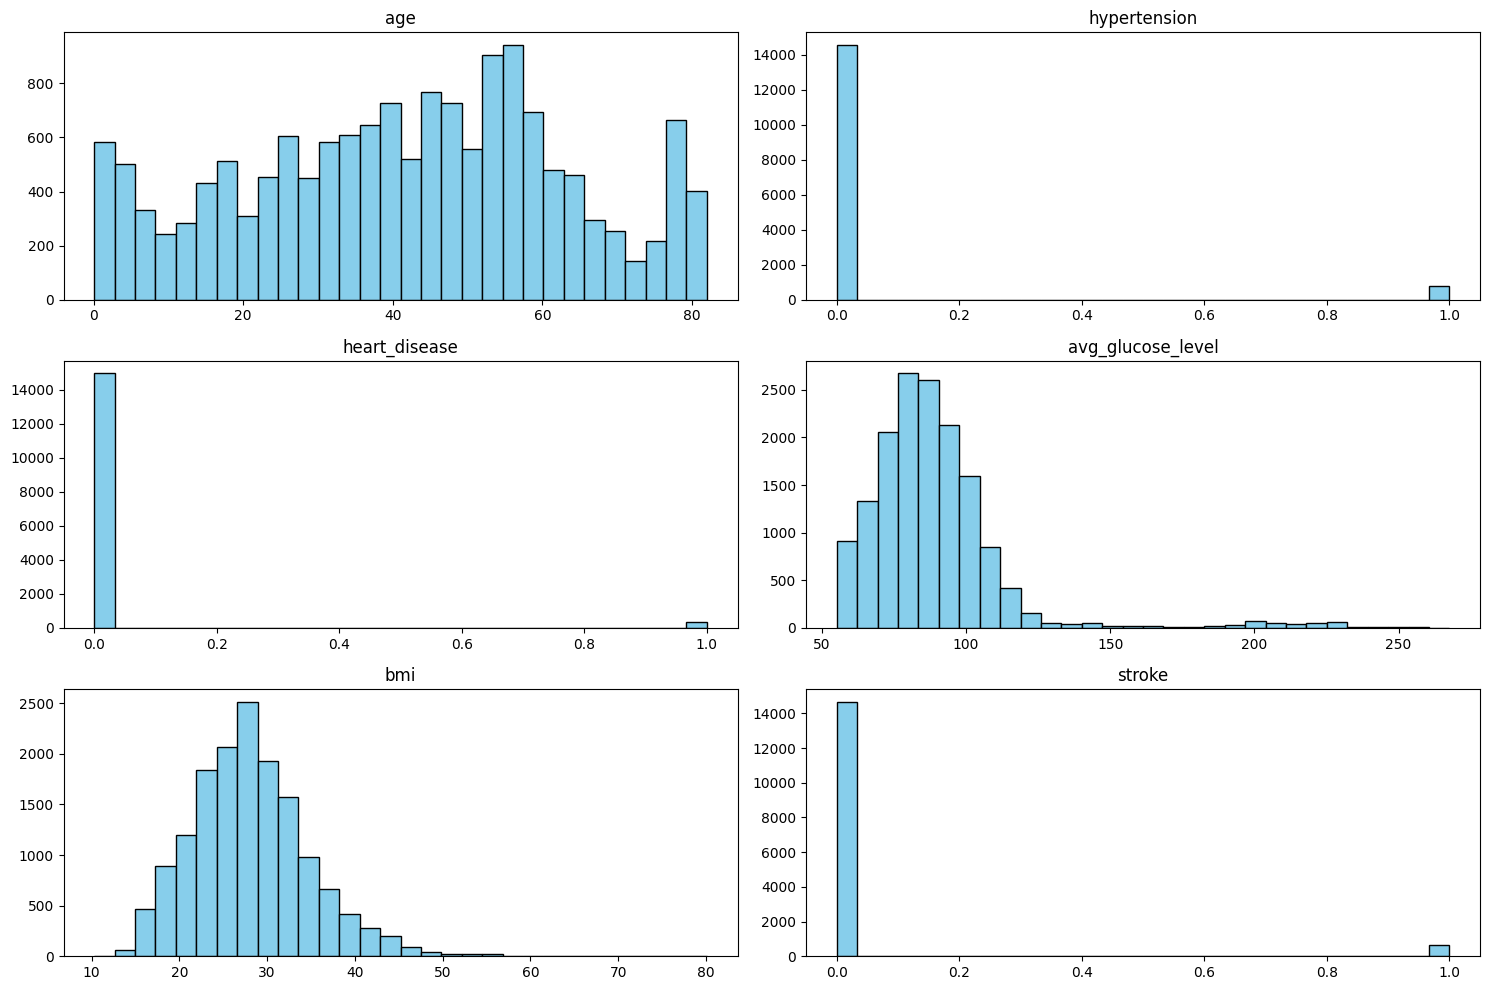

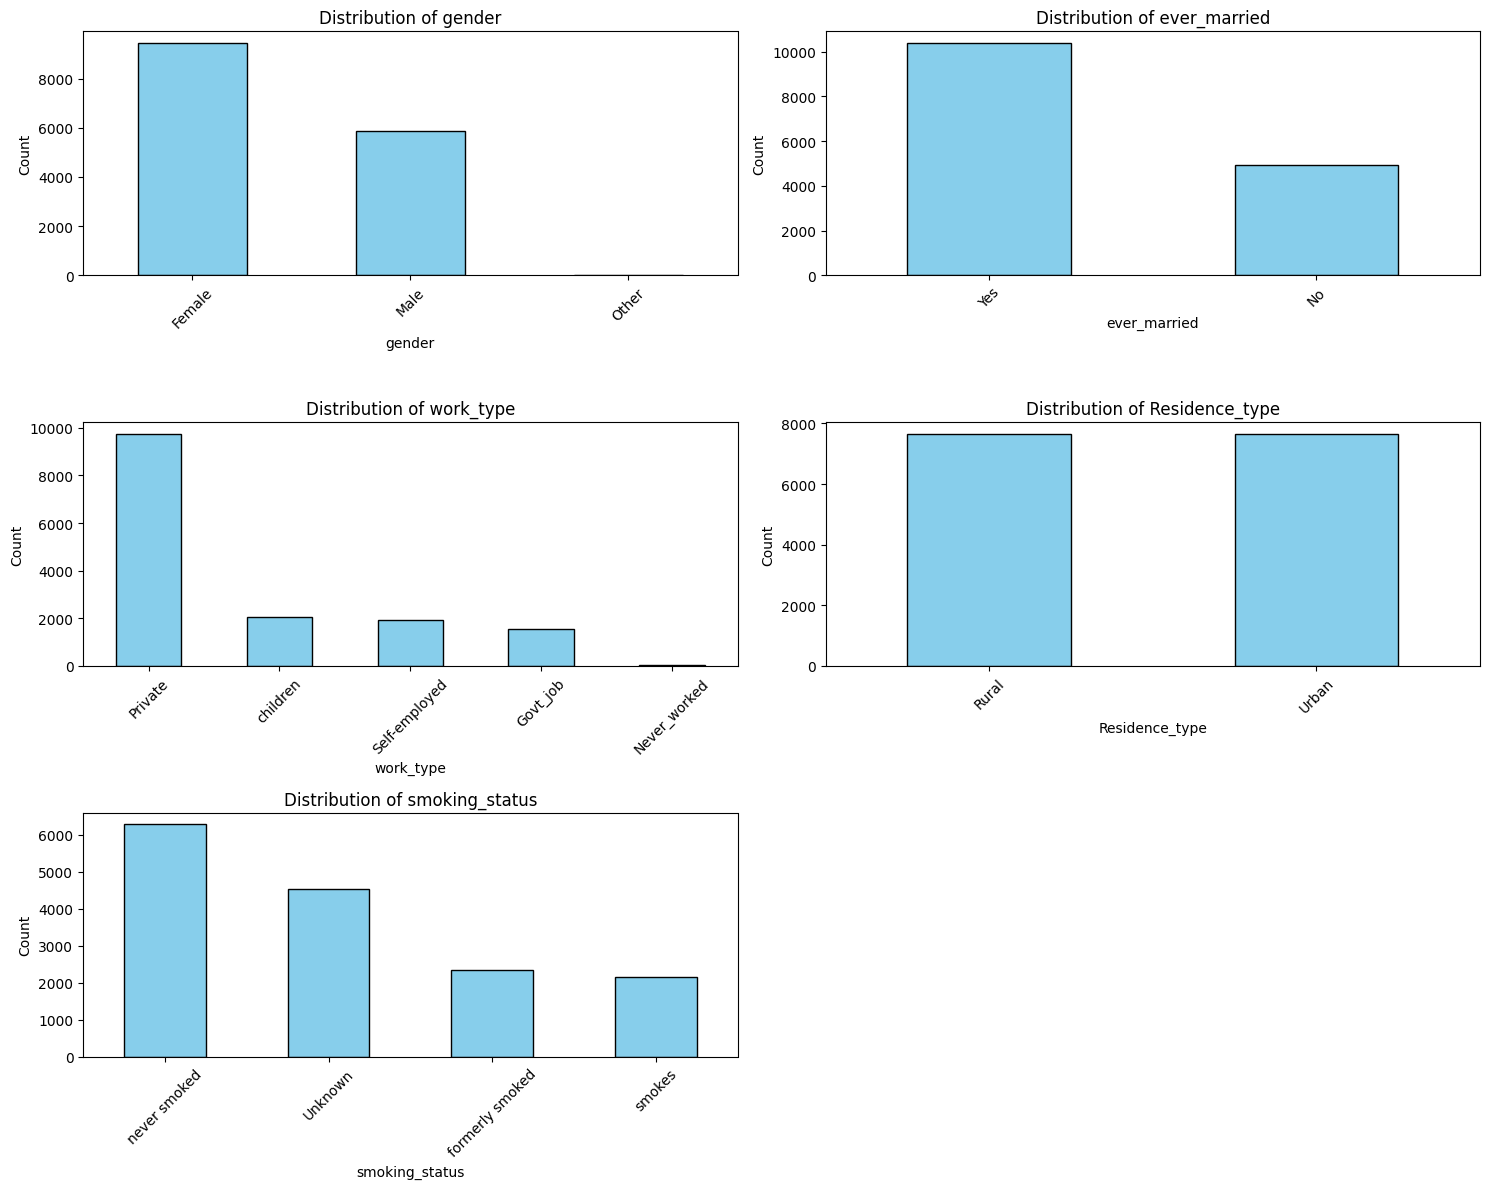

In [6]:
# univariate analysis

plt.figure(figsize=(15, 12))

# Plot histograms for numeric columns
numeric_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
df[numeric_cols].hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black', grid = False)
plt.tight_layout()
plt.show()

# Plot histograms for categorical columns (bar plots)
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)  # Adjust depending on how many plots you have
    df[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [7]:
def is_binary(series):
    return set(series.dropna().unique()) <= {0, 1}

num_cols = []

for col in df:
    if df[col].dtype in ["int64", "int32", "float64", "float32"] and col != "id" and is_binary(df[col]) == False:
        num_cols.append(col)

statistics = df[num_cols].describe().T  # Transpose for easier reading

statistics['median'] = df[num_cols].median()  # Add the median to the summary
statistics['mode'] = df[num_cols].mode().iloc[0]  # Add the mode (only first mode if multiple)
statistics['std_dev'] = df[num_cols].std()  # Add the standard deviation

print("Key Statistical Measures:")
print(statistics[['mean', 'median', 'mode', 'std_dev']])

# outliers left out for the first as doesn't seem to be as interesting for this dataset for the first


Key Statistical Measures:
                        mean  median   mode    std_dev
age                41.417708   43.00  57.00  21.444673
avg_glucose_level  89.039853   85.12  85.84  25.476102
bmi                28.112721   27.60  23.40   6.722315


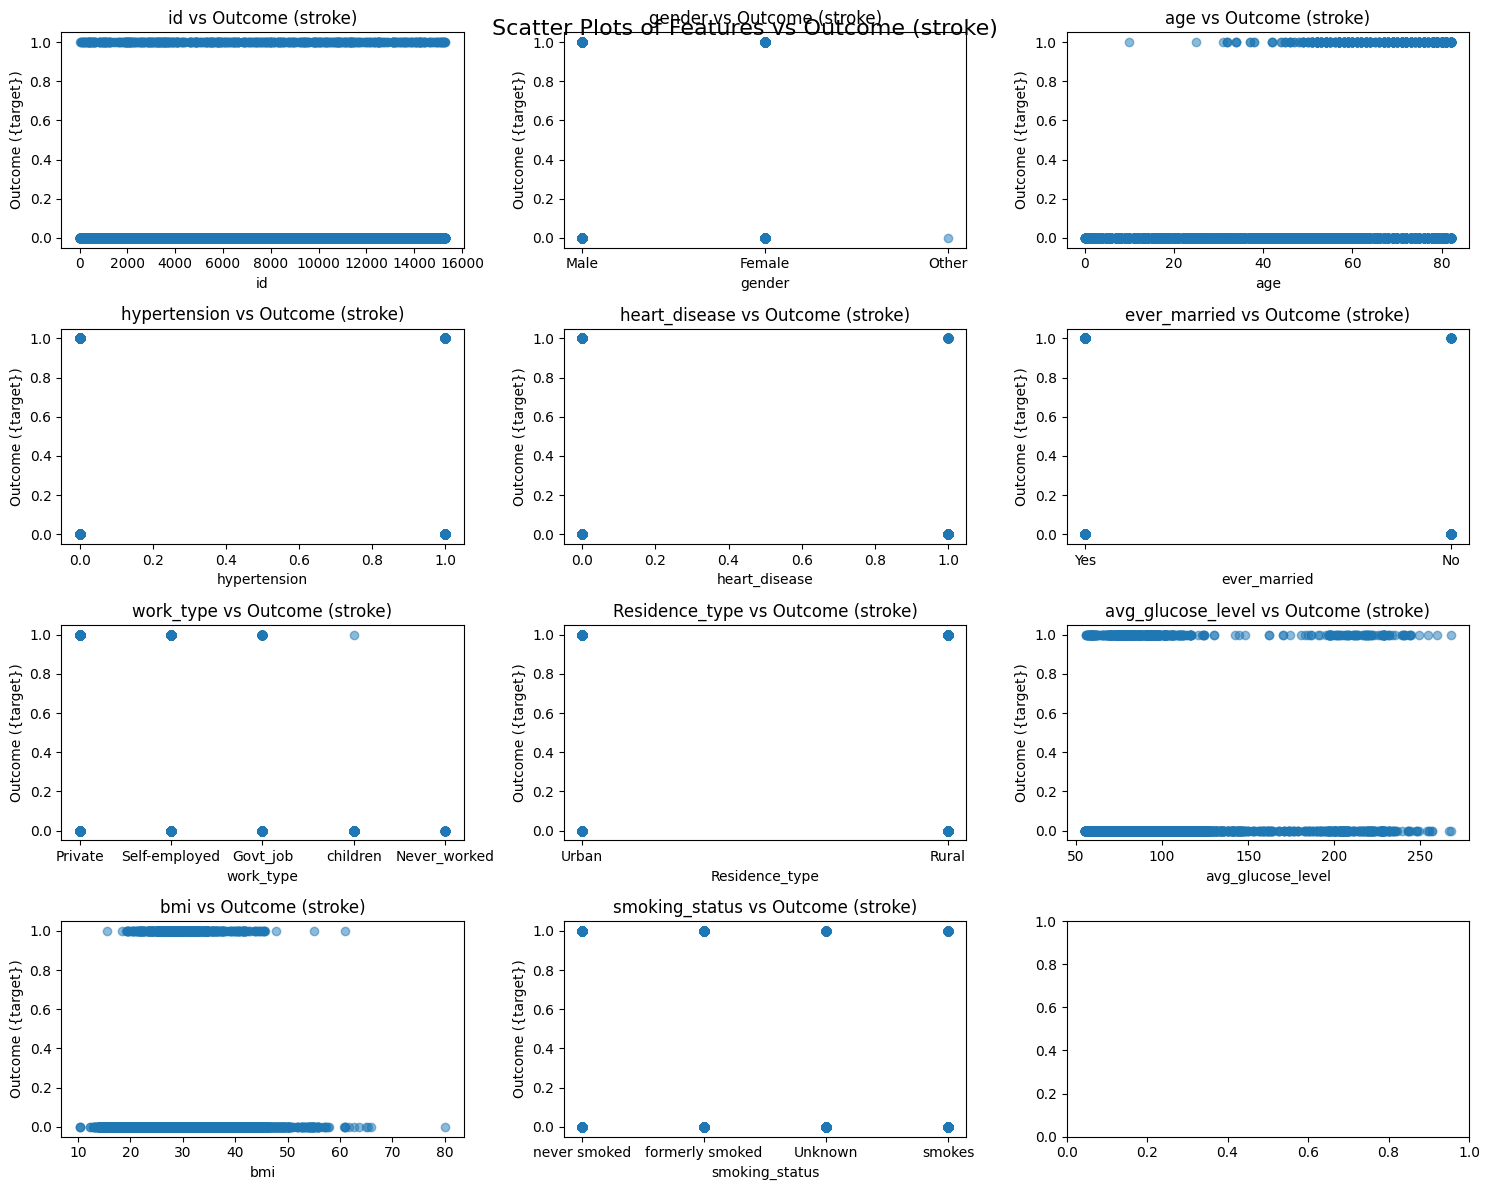

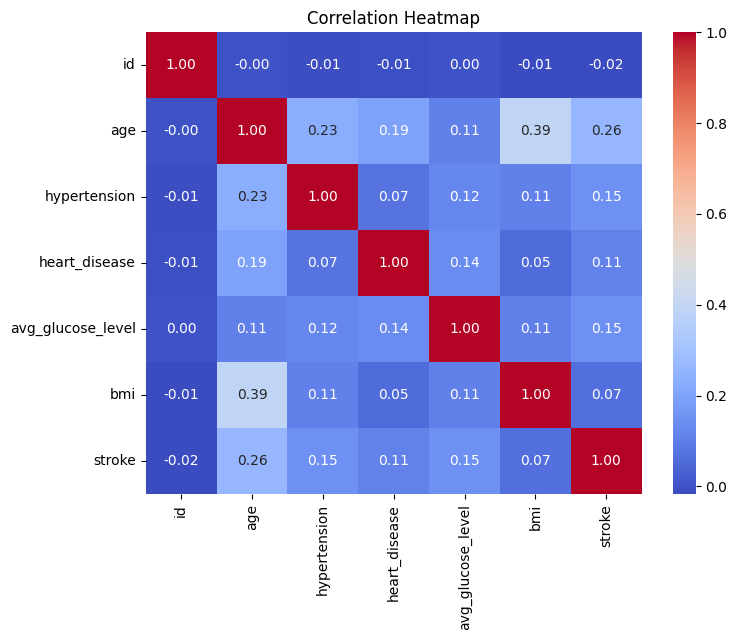

"\n# Correlation Matrix\ncorrelation_matrix = df.corr()\n\n# Plot the correlation matrix\nplt.figure(figsize=(12, 10))\nsns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)\nplt.title('Correlation Matrix')\nplt.show()\n"

In [8]:
# Scatter plots of each feature against the Outcome variable
features = df.columns[:-1]  # All columns except the last one ('Outcome')
target = df.columns[-1]

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=math.ceil(df.shape[1]/3), ncols=3, figsize=(15, 12))

# Plot scatter plots for each feature vs. Outcome
for i, feature in enumerate(features):
    row, col = divmod(i, 3)
    axes[row, col].scatter(df[feature], df[target], alpha=0.5)
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Outcome ({target})')
    axes[row, col].set_title(f'{feature} vs Outcome ({target})')

plt.tight_layout()
plt.suptitle(f'Scatter Plots of Features vs Outcome ({target})', fontsize=16)
plt.show()

# Filter numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
"""
# Correlation Matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
"""


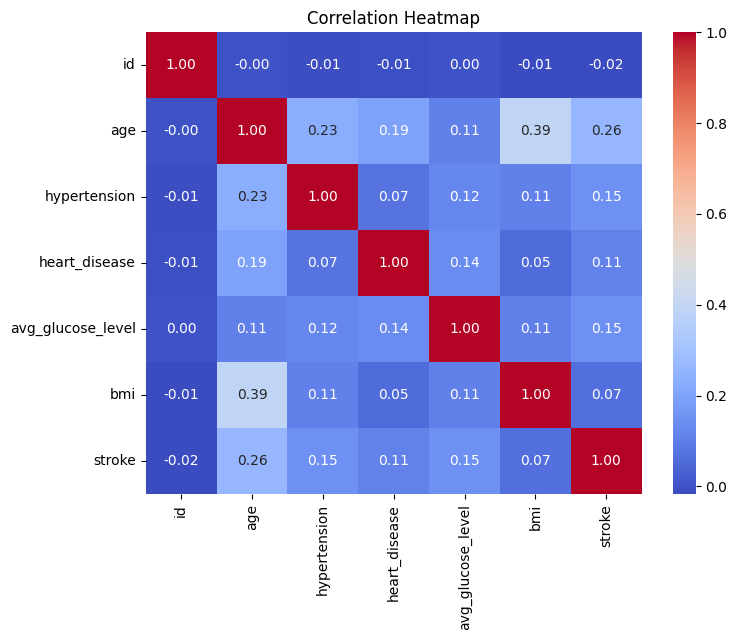

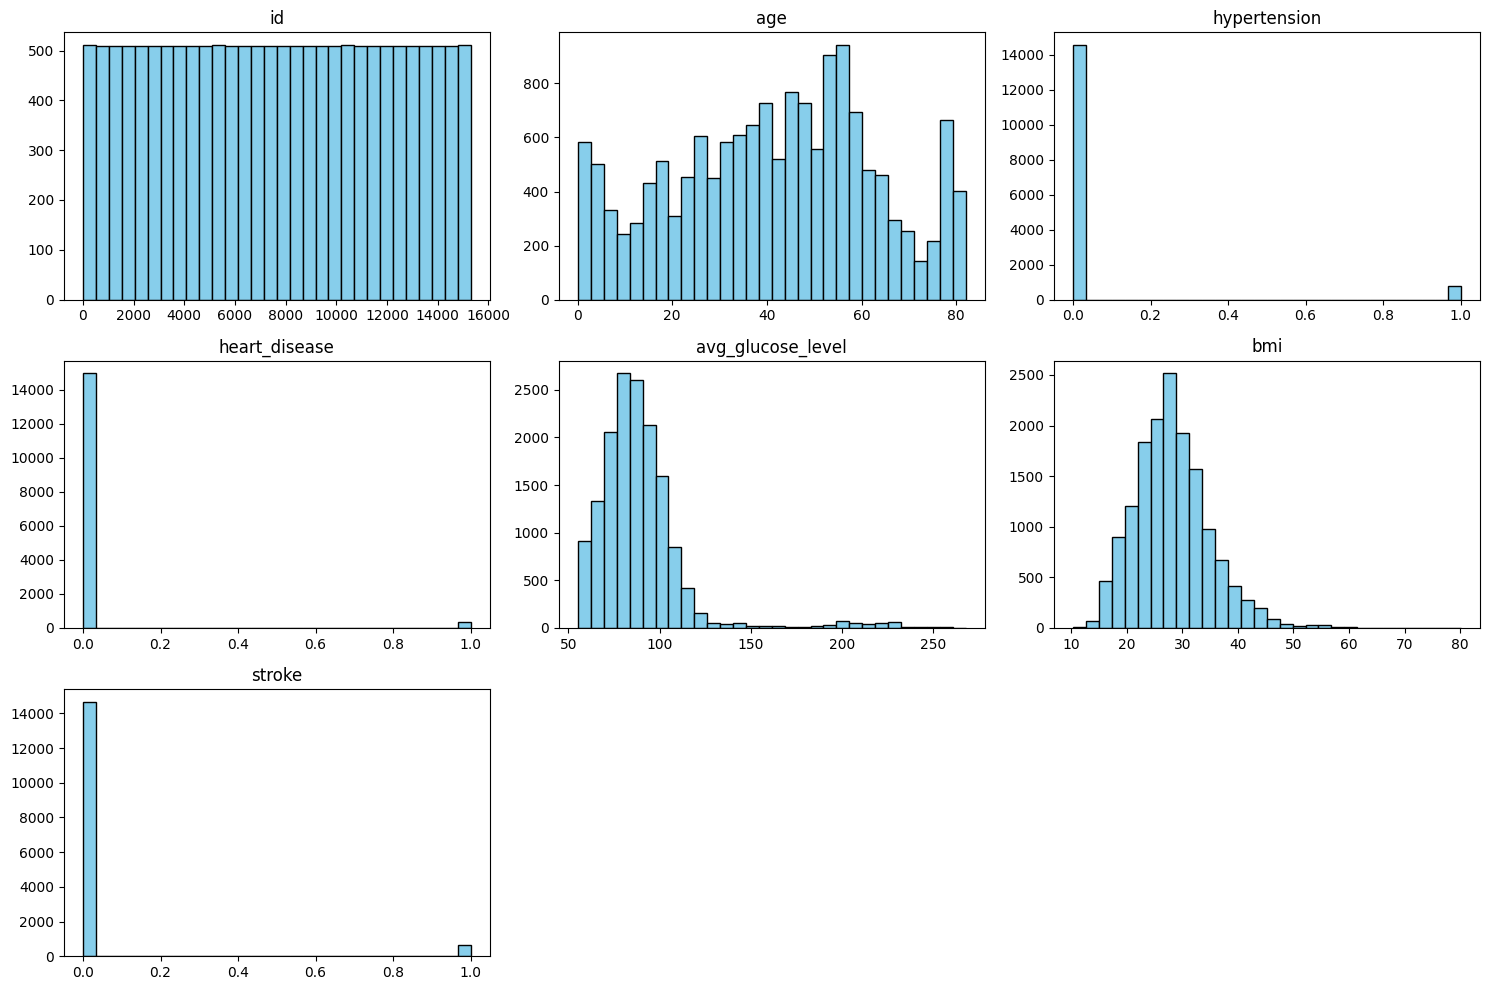

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2931
           1       0.50      0.03      0.06       130

    accuracy                           0.96      3061
   macro avg       0.73      0.51      0.52      3061
weighted avg       0.94      0.96      0.94      3061



/home/maskee00/anaconda3/envs/streamlit_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, mean_squared_error

# Daten aus verschiedenen Dateiformaten laden
def return_df(file_path):
    extension = file_path.split(".")[-1]
    if extension == "csv":
        df = pd.read_csv(file_path)
    elif extension == "tsv":
        df = pd.read_csv(file_path, sep="\t")
    elif extension == "xlsx":
        df = pd.read_excel(file_path)
    elif extension == "xml":
        df = pd.read_xml(file_path)
    elif extension == "json":
        df = pd.read_json(file_path)
    return df

# Korrelationmatrix plotten
def plot_correlation_matrix(df):
    numeric_df = df.select_dtypes(include=['number'])
    corr_matrix = numeric_df.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()

# Histogramme für numerische Spalten plotten
def plot_numeric_histograms(df):
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
    if numeric_cols:
        df[numeric_cols].hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black', grid=False)
        plt.tight_layout()
        plt.show()

# Daten vorverarbeiten
def preprocess_data(X_train, X_test, categorical_columns):
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    
    X_train_encoded = encoder.fit_transform(X_train[categorical_columns])
    X_test_encoded = encoder.transform(X_test[categorical_columns])
    
    X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_columns))
    X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_columns))
    
    X_train = X_train.drop(columns=categorical_columns).reset_index(drop=True)
    X_test = X_test.drop(columns=categorical_columns).reset_index(drop=True)
    
    X_train_encoded_df = pd.concat([X_train, X_train_encoded_df], axis=1)
    X_test_encoded_df = pd.concat([X_test, X_test_encoded_df], axis=1)
    
    return X_train_encoded_df, X_test_encoded_df



# Korrelationen plotten
# plot_correlation_matrix(df)

# Histogramme plotten
# plot_numeric_histograms(df)

# Beispiel Machine Learning
target_variable = "stroke"  # Spalte mit Zielwert
X = df.drop(columns=[target_variable])
y = df[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
X_train_encoded, X_test_encoded = preprocess_data(X_train, X_test, categorical_columns)

# Trainiere ein Modell (z.B. Logistic Regression)
clf = LogisticRegression()
clf.fit(X_train_encoded, y_train)

# Teste das Modell
y_pred = clf.predict(X_test_encoded)
print(classification_report(y_test, y_pred))
